<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/%EB%B6%84%EB%A5%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **| 분류 연습 문제**
___
출처 : 핸즈온 머신러닝 Ch03 분류 연습문제 1, 2번

In [1]:
# import data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

In [2]:
X, y = mnist["data"], mnist["target"]

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **1. MNIST 데이터셋으로 분류기를 만들어 테스트 세트에서 97% 정확도를 달성해보세요.**
___

1. `KNeghtborsClassifier`를 사용하는 것을 추천합니다. 
2. `weights`와 `n_neighbors` 하이퍼 파라미터로 그리드 탐색을 시도하여, 좋은 하이퍼 파라미터 값을 찾아보세요.

In [4]:
# import package
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Try GridSearch to optimize hyperparameter
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
grid_params = {
    'n_neighbors' : [3,4,5],
    'weights' : ["uniform", "distance"]
}

gridcv = GridSearchCV(knn_clf, grid_params, cv=10)
gridcv.fit(X_train,y_train)
print("Best Parameters : ", gridcv.best_params_)

Best Parameters :  {'n_neighbors': 4, 'weights': 'distance'}


In [6]:
# best hyperparameter
print("Best Parameters : ", gridcv.best_params_)

Best Parameters :  {'n_neighbors': 4, 'weights': 'distance'}


In [7]:
# best score
print("Best Score : ", gridcv.best_score_)

Best Score :  0.972469387755102


In [8]:
# model test
print("Best Test Score : ", gridcv.score(X_test, y_test))

Best Test Score :  0.9715714285714285


### **2. 다음 단계를 따라 인위적으로 훈련 세트를 늘리는 데이터 증식 또는 훈련 세트 확장 기법을 연습해봅시다.**
___

#### **STEP 1. MNIST 이미지를 (왼, 오른, 위, 아래) 어느 방향으로든 한 픽셀 이동시킬 수 있는 함수를 만들어 보세요.**

In [11]:
from scipy.ndimage.interpolation import shift

In [12]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

####  **STEP 2. 앞에서 만든 함수를 이용하여, 훈련 세트에 있는 각 이미지에 대해 네 개의 이동된 복사본(방향마다 한 개씩)을 만들어 훈련 세트에 추가하세요**

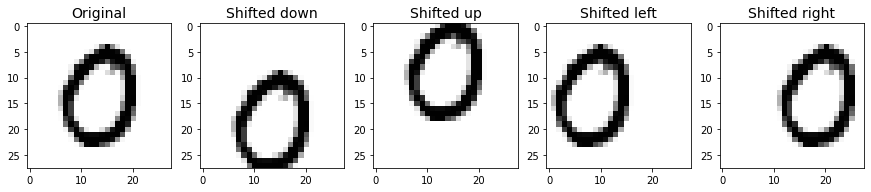

In [25]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, 0, -5)
shifted_image_left = shift_image(image, -5, 0)
shifted_image_right = shift_image(image, 5, 0)

import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(151)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(152)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(153)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(154)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(155)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [19]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

####  **STEP 3. 위에서 확장한 데이터셋을 이용하여, 1번 문제에서 찾은 최적 모델을 훈련시키고, 테스트 세트에서 정확도를 측정해보세요**

In [20]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [21]:
knn_clf = KNeighborsClassifier(**gridcv.best_params_)

In [22]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [27]:
knn_clf.score(X_test,y_test)

0.9791428571428571